## To Give or Not to Give? Loan Approval Prediction

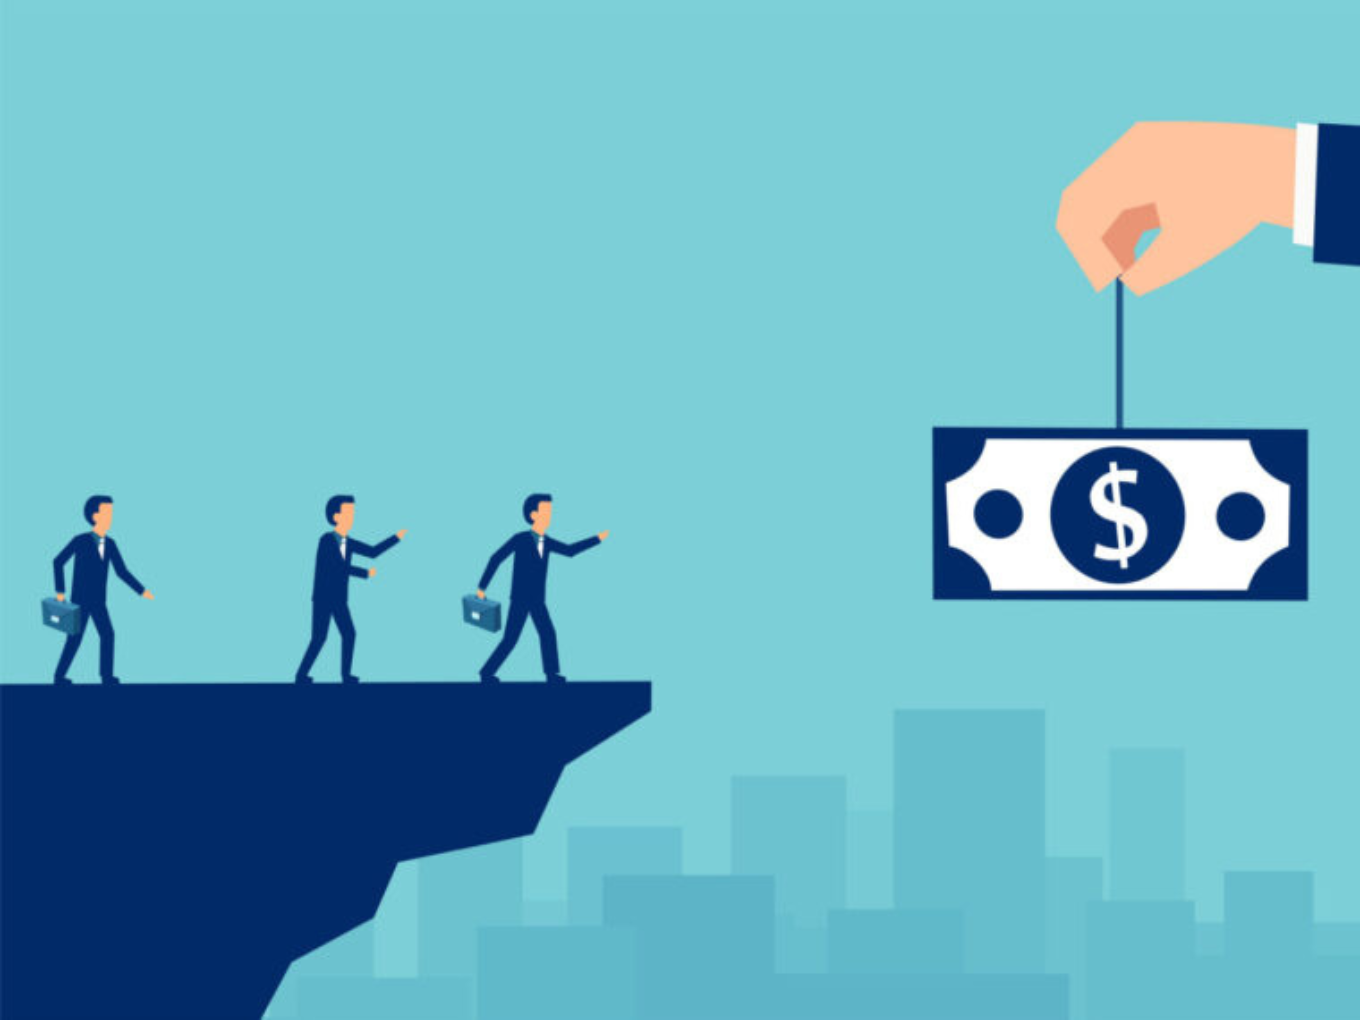

### A. Framing the Problem

The number of Kenyans applying for loans from lending institutions has grown drastically as higher levels of financial literacy are attained. The use of digital lending apps has also increased with the Safaricom Fuliza product featuring heavily on usage. While banks and saccos offer an avenue for funds acquisition, many would-be customers get their applications rejected due to lack of collateral, proof of regular income, poor credit scores or lack of guarantors. This has popularized the use of digital lending apps as more and more people struggle to meet their expenses. 
Yaspi, a digital lending microfinance institution has just joined the market share of digital lending apps and they would like to offer credit services to customers. The applicant fills in a loan form after which the Yaspi validates the applicant's eligibility for the loan using the applicants details. However, they still don’t have assurance if the applicants are able to repay the loans with no difficulties. The company has established that manually analyzing the applications is time consuming and prone to error. They think it would be helpful to train a model that can automate the process, while predicting if an applicant qualifies for the loan or not.


#### Generating the Hypothesis
The loan approval is dependent on many factors. For instance, applicants with a regular income would be given higher precedent for loan approval than those without regular incomes. Salaried individuals are also likely to be given more consideration than those without monthly salaries. Applicants with requests for high loan amounts also risk rejection as they carry a higher risk of defaulting. Based on this factors, we will be imploring the data to understand which factors should be considered when loaning applicants.

### B. Importing the data

For this task, we will use the Loan approval prediction dataset from Analytics Vidhya.  The loan approval dataset is a compilation of financial records and related data that's used to assess a person's suitability for a loan from a lending institution. It takes into account a number of variables, including gender, marital status, no of dependants, education level, loan amount, credit history and others. We will be predicting the laon status, i.e whether or not a loan is approved. The data is already separated into training and test sets. We will start off by loading and viewing the training dataset.

In [3]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


#Load the dataset
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

#Let's take a look at the top five rows of the training set using the Dataframe's head () method.
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Each row represents an individual record with 13 attributes such as education, loan amount, applicantincome, loan status and so on. We use the info ( ) method to further understand the description of the dataset.There are 614 instances in the dataset. There are missing values in some of the attributes. Some of the attributes are numerical except the Loan_ID,Gender, Married,Dependents, Education and Self_Employed  which are object formats. The loan status attribute is a categorical variable with the status Y and N for approved or rejected.

We will make a copy of the train and test set datasets to maintain the original datasets.

In [5]:
train_data = train_df.copy()
test_data = test_df.copy()

In [7]:
#inspect the test data columns
test_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

The test set data has the same columns as the train data, but does not have the loan_status attribute since it will be used for testing. The description for the dataset are contained in the text file in the working folder.

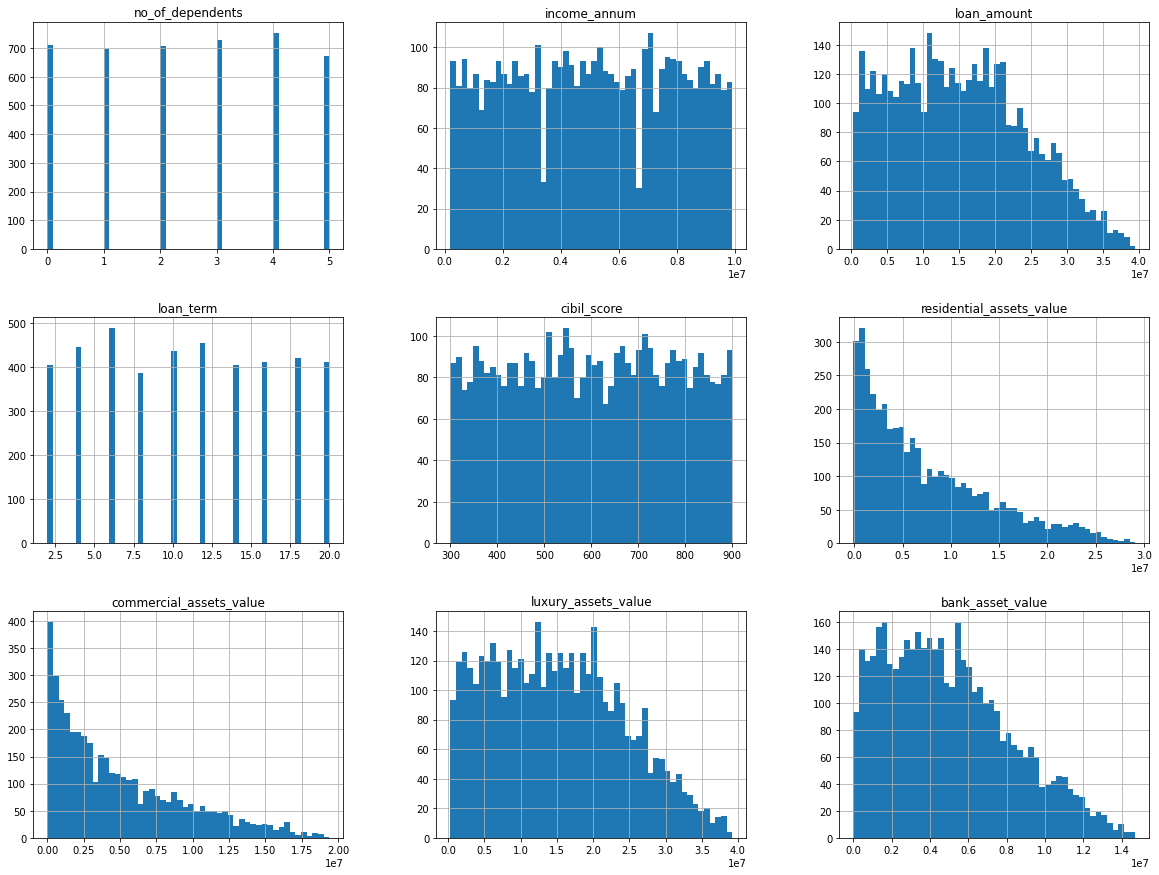

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
loan_df.hist(bins=50, figsize=(20,15))
plt.show()

## C. Visualizing the Data to Gain Insights

In [11]:
#Let's start by looking at the attributes in our dataframe

print(loan_df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


Let's look at how each attribute corrleates with the loan_status. In other words, which has attribute has a strong relationship with whether or not a loan is approved.

In [17]:
#Look for correlation
correlation_matrix = loan_df.corr(method='pearson')
correlation_matrix

# import seaborn as sns

# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()

# # Check correlation of 'loan_status' with other attributes
# correlation_with_loan_status = correlation_matrix['loan_status']
# print("Correlation with loan_status:\n", correlation_with_loan_status)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


### D. Prepare the data for Machine Learning

#### Label encoding


In [18]:
from sklearn.preprocessing import LabelEncoder

# Create an instance for the encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
loan_df['education'] = label_encoder.fit_transform(loan_df['education'])

# Apply label encoding to the 'self_employed' column
loan_df['self_employed'] = label_encoder.fit_transform(loan_df['self_employed'])

# Apply label encoding to the 'loan_status' column
loan_df['loan_status'] = label_encoder.fit_transform(loan_df['loan_status'])

#DataFrame with encoded columns
print(loan_df[['education', 'self_employed','loan_status']])

      education  self_employed  loan_status
0             0              0            0
1             1              1            1
2             0              0            1
3             0              0            1
4             1              1            1
...         ...            ...          ...
4264          0              1            1
4265          1              1            0
4266          1              0            1
4267          1              0            0
4268          0              0            0

[4269 rows x 3 columns]


We can check that in the dataframe

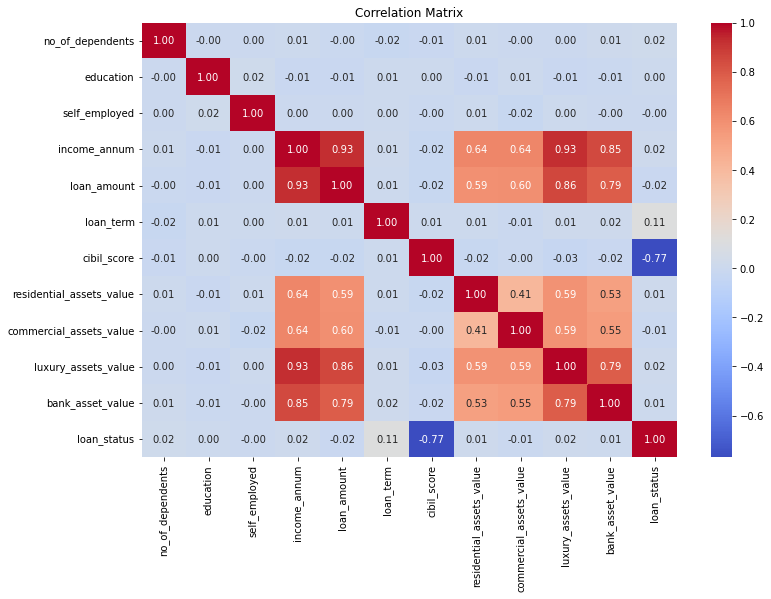

Correlation with loan_status:
 no_of_dependents            0.018114
education                   0.004918
self_employed              -0.000345
income_annum                0.015189
loan_amount                -0.016150
loan_term                   0.113036
cibil_score                -0.770518
residential_assets_value    0.014367
commercial_assets_value    -0.008246
luxury_assets_value         0.015465
bank_asset_value            0.006778
loan_status                 1.000000
Name: loan_status, dtype: float64


In [20]:
loan_df
correlation_matrix = loan_df.corr(method='pearson')
correlation_matrix
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Check correlation of 'loan_status' with other attributes
correlation_with_loan_status = correlation_matrix['loan_status']
print("Correlation with loan_status:\n", correlation_with_loan_status)

In [27]:
loan_df.dtypes

no_of_dependents            int64
education                   int64
self_employed               int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
dtype: object

#### Feature Scaling
We will use a standard scaler to standardize the features.

In [28]:
from sklearn.preprocessing import StandardScaler

# StandardScaler instance
scaler = StandardScaler()

# Define the feature columns (X) and target column (y)
x = loan_df.drop(columns=['loan_status'])  # Drop 'loan_status' column
y = loan_df['loan_status'] 

#Scaling the numerical columns. The "loan status" column is not included
columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
           'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
           'bank_asset_value']

#applying the scaler to the numerical columns
x[columns] = scaler.fit_transform(x[columns])

print("Scaled Feature Variables (x):")
print(x.head())

print("\nTarget Variable (y):")
print(y.head())


Scaled Feature Variables (x):
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0         -0.294102          0              0      1.617979     1.633052   
1         -1.473548          1              1     -0.341750    -0.324414   
2          0.295621          0              0      1.439822     1.610933   
3          0.295621          0              0      1.119139     1.721525   
4          1.475067          1              1      1.689242     1.002681   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0   0.192617     1.032792                 -0.780058                 2.877289   
1  -0.508091    -1.061051                 -0.733924                -0.631921   
2   1.594031    -0.544840                 -0.057300                -0.107818   
3  -0.508091    -0.771045                  1.649637                -0.381263   
4   1.594031    -1.264055                  0.757724                 0.735304   

   luxury_assets_value  bank_ass

### E. Modelling

#### Split the dataset


In [29]:
# split the data using the 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Logistic regression

In [69]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [70]:
# Create a LogisticRegression instance
logistic_regression = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_regression.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_regression.predict(x_test)

In [71]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [72]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

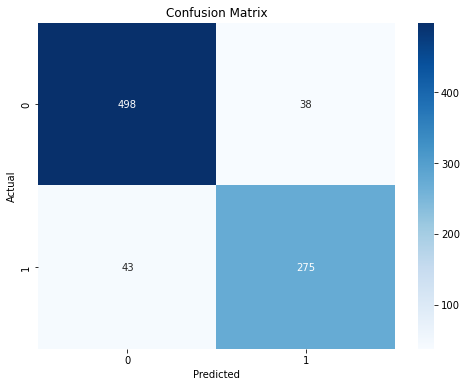

In [44]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [73]:
# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

Accuracy: 0.905152224824356
Precision: 0.9049067721845864
Recall: 0.905152224824356
F1 Score: 0.9049966078550483
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



#### Decision trees

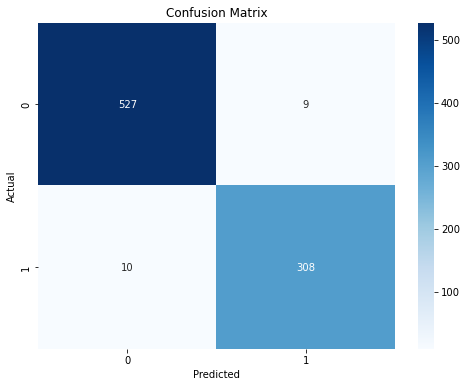

Decision Tree Classifier Metrics:
Accuracy: 0.977751756440281
Precision: 0.9777403171039073
Recall: 0.977751756440281
F1 Score: 0.9777446054465413
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [64]:
#Import the decision tree classifier from Sklearn

from sklearn.tree import DecisionTreeClassifier

# Instanciate a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Training the model
decision_tree.fit(x_train, y_train)

# Make a prediction on the test set
y_pred = decision_tree.predict(x_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precison, recall and f1 score.
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Get the classification report
classification_rep = classification_report(y_test, y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Printing the evaluation matrix
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Printing the classification matrix
print("Classification Report:\n", classification_rep)

#### Random Forest

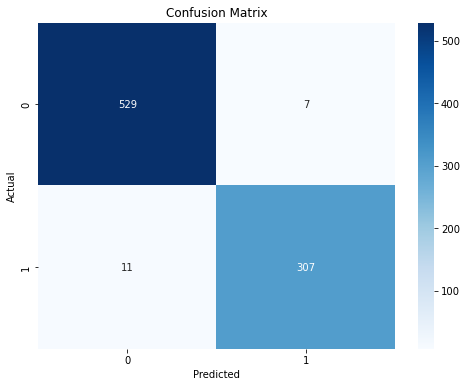

Random Forest Classifier Metrics:
Accuracy: 0.9789227166276346
Precision: 0.9789137113664627
Recall: 0.9789227166276346
F1 Score: 0.9788951934704381
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [75]:
#import randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

#Instanciate the random forest classifier with a random state of 42
random_forest = RandomForestClassifier(random_state=42)

#Fit the model
random_forest.fit(x_train, y_train)

# Make a prediction on the test set
y_pred = random_forest.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision, recall, and F1 score of the model
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# GGet the classification report for the model
classification_rep = classification_report(y_test, y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Show the metrics by printing them separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print classification report
print("Classification Report:\n", classification_rep)

### F. Model Fine Tuning

In [ ]:
In this section, we will fine tune the logistic regression model using the 